# Setup

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

## Load 1 Hz data

In [2]:
hz_dataset_path = 'data/WEEE Dataset/processed/merged_weee_dataset.csv'
hz_df = pd.read_csv(hz_dataset_path, parse_dates=['Time']).sort_values(by='Time')
hz_df

,Time,heart_rate,VO2[mL/kg/min],VO2[mL/min],t,Weight,Height,Gender,Age,subject_id,EE[kcal/min],EE[kcal/kg/min]
1799,2021-11-25 17:17:43,64.765699,2.52,188.67,0,77.0,173,1,26,P02,930.89778,12.43368
1800,2021-11-25 17:17:44,59.656709,2.52,188.67,1,77.0,173,1,26,P02,930.89778,12.43368
1801,2021-11-25 17:17:45,110.264730,2.52,188.67,2,77.0,173,1,26,P02,930.89778,12.43368
1802,2021-11-25 17:17:46,84.384969,2.52,188.67,3,77.0,173,1,26,P02,930.89778,12.43368
1803,2021-11-25 17:17:47,60.196520,2.34,175.33,4,77.0,173,1,26,P02,865.07822,11.54556
...,...,...,...,...,...,...,...,...,...,...,...,...
1794,2021-12-03 17:28:47,134.920374,13.34,920.33,1794,70.6,166,0,29,P01,4540.90822,65.81956
1795,2021-12-03 17:28:48,159.813979,13.34,920.33,1795,70.6,166,0,29,P01,4540.90822,65.81956
1796,2021-12-03 17:28:49,140.897191,13.34,920.33,1796,70.6,166,0,29,P01,4540.90822,65.81956
1797,2021-12-03 17:28:50,154.094574,13.34,920.33,1797,70.6,166,0,29,P01,4540.90822,65.81956


In [3]:
hz_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27895 entries, 1799 to 1798
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             27895 non-null  datetime64[ns]
 1   heart_rate       27895 non-null  float64       
 2   VO2[mL/kg/min]   27895 non-null  float64       
 3   VO2[mL/min]      27895 non-null  float64       
 4   t                27895 non-null  int64         
 5   Weight           27895 non-null  float64       
 6   Height           27895 non-null  int64         
 7   Gender           27895 non-null  int64         
 8   Age              27895 non-null  int64         
 9   subject_id       27895 non-null  object        
 10  EE[kcal/min]     27895 non-null  float64       
 11  EE[kcal/kg/min]  27895 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 2.8+ MB


## Load raw acceleration data

In [4]:
filtered_acc_path = 'data/WEEE Dataset/processed/filtered_acceleration.csv'
filtered_acc_df = pd.read_csv(filtered_acc_path, parse_dates=['Time']).sort_values(by='Time')
filtered_acc_df

,X,Y,Z,Time,subject_id
57568,42.0,-29.0,36.0,2021-11-25 17:17:43.000000,P02
57569,42.0,-29.0,37.0,2021-11-25 17:17:43.031250,P02
57570,41.0,-29.0,37.0,2021-11-25 17:17:43.062500,P02
57571,42.0,-29.0,37.0,2021-11-25 17:17:43.093750,P02
57572,42.0,-29.0,36.0,2021-11-25 17:17:43.125000,P02
...,...,...,...,...,...
57563,12.0,-48.0,30.0,2021-12-03 17:28:51.843750,P01
57564,21.0,-48.0,43.0,2021-12-03 17:28:51.875000,P01
57565,17.0,-49.0,35.0,2021-12-03 17:28:51.906250,P01
57566,21.0,-51.0,34.0,2021-12-03 17:28:51.937500,P01


In [5]:
filtered_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892640 entries, 57568 to 57567
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   X           892640 non-null  float64       
 1   Y           892640 non-null  float64       
 2   Z           892640 non-null  float64       
 3   Time        892640 non-null  datetime64[ns]
 4   subject_id  892640 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 40.9+ MB


## Merge data

In [6]:
merged_df = pd.merge_asof(
    filtered_acc_df, hz_df,
    on='Time',
    by='subject_id',
    direction='backward'
).sort_values(by=['subject_id','Time']).reset_index(drop=True)
merged_df

,X,Y,Z,Time,subject_id,heart_rate,VO2[mL/kg/min],VO2[mL/min],t,Weight,Height,Gender,Age,EE[kcal/min],EE[kcal/kg/min]
0,29.0,0.0,56.0,2021-12-03 16:58:53.000000,P01,94.690403,6.81,470.17,0,70.6,166,0,29,2319.81878,33.60054
1,29.0,0.0,56.0,2021-12-03 16:58:53.031250,P01,94.690403,6.81,470.17,0,70.6,166,0,29,2319.81878,33.60054
2,29.0,0.0,55.0,2021-12-03 16:58:53.062500,P01,94.690403,6.81,470.17,0,70.6,166,0,29,2319.81878,33.60054
3,30.0,0.0,56.0,2021-12-03 16:58:53.093750,P01,94.690403,6.81,470.17,0,70.6,166,0,29,2319.81878,33.60054
4,30.0,0.0,56.0,2021-12-03 16:58:53.125000,P01,94.690403,6.81,470.17,0,70.6,166,0,29,2319.81878,33.60054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892635,7.0,-47.0,-9.0,2021-12-02 17:34:07.843750,P17,100.206843,11.12,858.83,1798,77.2,175,1,33,4237.46722,54.86608
892636,-24.0,-71.0,-15.0,2021-12-02 17:34:07.875000,P17,100.206843,11.12,858.83,1798,77.2,175,1,33,4237.46722,54.86608
892637,-31.0,-63.0,-8.0,2021-12-02 17:34:07.906250,P17,100.206843,11.12,858.83,1798,77.2,175,1,33,4237.46722,54.86608
892638,-25.0,-56.0,-7.0,2021-12-02 17:34:07.937500,P17,100.206843,11.12,858.83,1798,77.2,175,1,33,4237.46722,54.86608


### Drop extra columns

In [7]:
keep_cols = [
    # time and subject id
    'Time',
    'subject_id',
    # accelerometer
    'X',
    'Y',
    'Z',
    # heart rate
    'heart_rate',
    # demographics
    'Weight',
    'Height',
    'Gender',
    'Age',
    # label
    'EE[kcal/min]'

]
merged_df_smol = merged_df[keep_cols]
merged_df_smol

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,2021-12-03 16:58:53.000000,P01,29.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
1,2021-12-03 16:58:53.031250,P01,29.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
2,2021-12-03 16:58:53.062500,P01,29.0,0.0,55.0,94.690403,70.6,166,0,29,2319.81878
3,2021-12-03 16:58:53.093750,P01,30.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
4,2021-12-03 16:58:53.125000,P01,30.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
...,...,...,...,...,...,...,...,...,...,...,...
892635,2021-12-02 17:34:07.843750,P17,7.0,-47.0,-9.0,100.206843,77.2,175,1,33,4237.46722
892636,2021-12-02 17:34:07.875000,P17,-24.0,-71.0,-15.0,100.206843,77.2,175,1,33,4237.46722
892637,2021-12-02 17:34:07.906250,P17,-31.0,-63.0,-8.0,100.206843,77.2,175,1,33,4237.46722
892638,2021-12-02 17:34:07.937500,P17,-25.0,-56.0,-7.0,100.206843,77.2,175,1,33,4237.46722


In [8]:
merged_df_smol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892640 entries, 0 to 892639
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Time          892640 non-null  datetime64[ns]
 1   subject_id    892640 non-null  object        
 2   X             892640 non-null  float64       
 3   Y             892640 non-null  float64       
 4   Z             892640 non-null  float64       
 5   heart_rate    892640 non-null  float64       
 6   Weight        892640 non-null  float64       
 7   Height        892640 non-null  int64         
 8   Gender        892640 non-null  int64         
 9   Age           892640 non-null  int64         
 10  EE[kcal/min]  892640 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 74.9+ MB


In [9]:
merged_df_smol[merged_df_smol['subject_id'] == 'P01']

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,2021-12-03 16:58:53.000000,P01,29.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
1,2021-12-03 16:58:53.031250,P01,29.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
2,2021-12-03 16:58:53.062500,P01,29.0,0.0,55.0,94.690403,70.6,166,0,29,2319.81878
3,2021-12-03 16:58:53.093750,P01,30.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
4,2021-12-03 16:58:53.125000,P01,30.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
...,...,...,...,...,...,...,...,...,...,...,...
57563,2021-12-03 17:28:51.843750,P01,12.0,-48.0,30.0,142.848414,70.6,166,0,29,6372.26100
57564,2021-12-03 17:28:51.875000,P01,21.0,-48.0,43.0,142.848414,70.6,166,0,29,6372.26100
57565,2021-12-03 17:28:51.906250,P01,17.0,-49.0,35.0,142.848414,70.6,166,0,29,6372.26100
57566,2021-12-03 17:28:51.937500,P01,21.0,-51.0,34.0,142.848414,70.6,166,0,29,6372.26100


# Retreive statistics (excluding problem subejcts)

In [51]:
drop_subjects = ['P03', 'P04', 'P06', 'P11', 'P13', 'P14']

merged_df_drop_subs = merged_df_smol[~merged_df_smol['subject_id'].isin(drop_subjects)]
merged_df_drop_subs

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,2021-12-03 16:58:53.000000,P01,29.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
1,2021-12-03 16:58:53.031250,P01,29.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
2,2021-12-03 16:58:53.062500,P01,29.0,0.0,55.0,94.690403,70.6,166,0,29,2319.81878
3,2021-12-03 16:58:53.093750,P01,30.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
4,2021-12-03 16:58:53.125000,P01,30.0,0.0,56.0,94.690403,70.6,166,0,29,2319.81878
...,...,...,...,...,...,...,...,...,...,...,...
892635,2021-12-02 17:34:07.843750,P17,7.0,-47.0,-9.0,100.206843,77.2,175,1,33,4237.46722
892636,2021-12-02 17:34:07.875000,P17,-24.0,-71.0,-15.0,100.206843,77.2,175,1,33,4237.46722
892637,2021-12-02 17:34:07.906250,P17,-31.0,-63.0,-8.0,100.206843,77.2,175,1,33,4237.46722
892638,2021-12-02 17:34:07.937500,P17,-25.0,-56.0,-7.0,100.206843,77.2,175,1,33,4237.46722


In [52]:
merged_df_drop_subs['subject_id'].unique()

array(['P01', 'P02', 'P05', 'P07', 'P08', 'P09', 'P10', 'P12', 'P15',
       'P16', 'P17'], dtype=object)

In [54]:
merged_df_drop_subs.describe()

,Time,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
count,581888,581888.00000,581888.00000,581888.000000,581888.000000,581888.000000,581888.000000,581888.000000,581888.000000,581888.000000
mean,2021-11-30 18:57:17.442799616,24.22179,-18.41195,26.577114,81.173070,73.769484,172.741421,0.806643,30.763528,4002.895531
min,2021-11-25 17:17:43,-128.00000,-128.00000,-128.000000,0.703717,63.600000,163.000000,0.000000,24.000000,537.806000
25%,2021-11-29 15:51:00.992187392,6.00000,-43.00000,9.000000,63.032653,67.700000,166.000000,1.000000,27.000000,1194.028000
50%,2021-11-30 11:49:58.984375040,24.00000,-30.00000,31.000000,81.768365,73.100000,173.000000,1.000000,33.000000,3086.217000
75%,2021-12-02 17:19:13.976562688,44.00000,1.00000,47.000000,101.128619,77.200000,177.000000,1.000000,33.000000,6264.551780
max,2021-12-03 17:28:51.968750,127.00000,127.00000,127.000000,167.725632,87.000000,186.000000,1.000000,41.000000,16910.446220
std,NaN,33.98229,35.48304,23.152612,31.640315,7.071388,6.644339,0.394931,4.492048,3034.273442


## Standardize features (skip since moving to new file)

In [11]:
feature_cols = [
    # accelerometer
    'X',
    'Y',
    'Z',
    # heart rate
    'heart_rate',
    # demographics
    'Weight',
    'Height',
    # 'Gender',
    'Age',
    # label
    'EE[kcal/min]'
]
scaler = StandardScaler()
std_df = merged_df_smol.copy()
std_df[feature_cols] = scaler.fit_transform(std_df[feature_cols])

In [12]:
std_df

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,2021-12-03 16:58:53.000000,P01,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
1,2021-12-03 16:58:53.031250,P01,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
2,2021-12-03 16:58:53.062500,P01,0.220972,0.454626,1.252592,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
3,2021-12-03 16:58:53.093750,P01,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
4,2021-12-03 16:58:53.125000,P01,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
...,...,...,...,...,...,...,...,...,...,...,...
892635,2021-12-02 17:34:07.843750,P17,-0.405016,-0.806902,-1.415019,0.640514,0.348866,0.405931,1,0.531476,0.274632
892636,2021-12-02 17:34:07.875000,P17,-1.287090,-1.451086,-1.665107,0.640514,0.348866,0.405931,1,0.531476,0.274632
892637,2021-12-02 17:34:07.906250,P17,-1.486268,-1.236358,-1.373337,0.640514,0.348866,0.405931,1,0.531476,0.274632
892638,2021-12-02 17:34:07.937500,P17,-1.315544,-1.048471,-1.331656,0.640514,0.348866,0.405931,1,0.531476,0.274632


In [34]:
merged_df_smol.describe()

,Time,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
count,892640,892640.000000,892640.00000,892640.000000,892640.000000,892640.000000,892640.000000,892640.000000,892640.000000,892640.000000
mean,2021-11-30 05:52:56.382816,21.234056,-16.93773,24.948428,81.085869,73.272422,172.332927,0.721742,30.236566,3481.625380
min,2021-11-25 17:17:43,-128.000000,-128.00000,-128.000000,0.610590,53.300000,160.000000,0.000000,23.000000,433.353220
25%,2021-11-29 10:42:23.742187520,1.000000,-43.00000,7.000000,65.228410,66.000000,166.000000,0.000000,26.000000,1133.191780
50%,2021-11-30 11:45:17.484375040,22.000000,-29.00000,29.000000,82.291418,71.800000,173.000000,1.000000,29.000000,2615.020000
75%,2021-12-01 15:32:36.226562560,41.000000,10.00000,46.000000,98.249753,77.200000,177.000000,1.000000,33.000000,5072.152000
max,2021-12-03 17:28:51.968750,127.000000,127.00000,127.000000,170.872296,99.700000,186.000000,1.000000,41.000000,16910.446220
std,NaN,35.144448,37.25645,23.991521,29.852576,11.258137,6.570272,0.448141,5.199545,2752.199323


In [12]:
std_df.describe()

,Time,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
count,892640,8.926400e+05,8.926400e+05,8.926400e+05,8.926400e+05,8.926400e+05,8.926400e+05,892640.000000,8.926400e+05,8.926400e+05
mean,2021-11-30 05:52:56.382816,6.113291e-18,6.317068e-17,-2.852869e-17,-1.221639e-15,-1.244564e-15,-1.752477e-15,0.721742,-5.909515e-17,-4.849878e-16
min,2021-11-25 17:17:43,-4.246308e+00,-2.981023e+00,-6.375107e+00,-2.695758e+00,-1.774044e+00,-1.877081e+00,0.000000,-1.391770e+00,-1.107577e+00
25%,2021-11-29 10:42:23.742187520,-5.757401e-01,-6.995375e-01,-7.481159e-01,-5.311926e-01,-6.459706e-01,-9.638765e-01,0.000000,-8.147960e-01,-8.532939e-01
50%,2021-11-30 11:45:17.484375040,2.179417e-02,-3.237635e-01,1.688752e-01,4.038343e-02,-1.307874e-01,1.015290e-01,1.000000,-2.378220e-01,-3.148776e-01
75%,2021-12-01 15:32:36.226562560,5.624204e-01,7.230357e-01,8.774593e-01,5.749552e-01,3.488660e-01,7.103322e-01,1.000000,5.314765e-01,5.779115e-01
max,2021-12-03 17:28:51.968750,3.009465e+00,3.863433e+00,4.253654e+00,3.007663e+00,2.347422e+00,2.080139e+00,1.000000,2.070074e+00,4.879308e+00
std,NaN,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.448141,1.000001e+00,1.000001e+00


## Apply sliding window

In [13]:
def create_sliding_windows(df, window_size=192, overlap=0.5, sample_rate=32) -> dict[list[pd.DataFrame]]:
    windows = {}
    step_size = int(window_size * overlap)
    max_gap_seconds = window_size / sample_rate

    for subject_id, group in df.groupby('subject_id'):
        windows[subject_id] = []

        group = group.sort_values(by='Time').reset_index(drop=True)
        group['time_diff'] = group['Time'].diff().dt.total_seconds()

        valid_sections = (group['time_diff'] <= max_gap_seconds) | (group['time_diff'].isna())
        group['valid_sections'] = valid_sections

        group['section_id'] = (~valid_sections).astype(int).cumsum()

        # print(f"{subject_id} diffs: {group[['Time', 'time_diff']].head(20)}")
        # print(f"Section ids count: {group['section_id'].value_counts()}")
        # print(group[['Time', 'time_diff', 'valid_sections']][~group['valid_sections']])

        for section_id, section in group.groupby('section_id'):
            if len(section) < window_size:
                # print(f"Skipping section {section_id} for subject {subject_id} (length {len(section)})")
                continue

            # print(f"{section_id}: {group[['Time', 'time_diff', 'section_id']].head(20)}")

            section.drop(columns=['time_diff', 'valid_sections'], inplace=True) #, 'section_id'

            for start in range(0, len(section) - window_size + 1, step_size):
                windows[subject_id].append(section.iloc[start:start + window_size].copy().reset_index(drop=True))

    return windows

In [35]:
windows_dict = create_sliding_windows(std_df)
# windows_dict = create_sliding_windows(merged_df_smol) # nvm we do want to standardize here
windows_dict.keys()

dict_keys(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17'])

In [36]:
len(windows_dict['P01'])

598

In [37]:
def display_windows(subject_windows_list):
        display(subject_windows_list[0])
        display(subject_windows_list[-1])

In [38]:
display_windows(windows_dict['P01'])

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min],section_id
0,2021-12-03 16:58:53.000000,P01,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138,0
1,2021-12-03 16:58:53.031250,P01,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138,0
2,2021-12-03 16:58:53.062500,P01,0.220972,0.454626,1.252592,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138,0
3,2021-12-03 16:58:53.093750,P01,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138,0
4,2021-12-03 16:58:53.125000,P01,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138,0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-03 16:58:58.843750,P01,0.249426,0.454626,1.252592,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203,0
188,2021-12-03 16:58:58.875000,P01,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203,0
189,2021-12-03 16:58:58.906250,P01,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203,0
190,2021-12-03 16:58:58.937500,P01,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203,0


,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min],section_id
0,2021-12-03 17:28:44.000000,P01,-0.063568,-0.780061,0.794096,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824,0
1,2021-12-03 17:28:44.031250,P01,-0.205838,-0.806902,0.544008,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824,0
2,2021-12-03 17:28:44.062500,P01,-0.120476,-0.780061,0.877459,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824,0
3,2021-12-03 17:28:44.093750,P01,-0.262746,-0.860584,0.544008,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824,0
4,2021-12-03 17:28:44.125000,P01,-0.006660,-0.887425,0.335601,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824,0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-03 17:28:49.843750,P01,-0.376562,-0.806902,0.627371,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886,0
188,2021-12-03 17:28:49.875000,P01,0.021794,-0.833743,0.669052,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886,0
189,2021-12-03 17:28:49.906250,P01,-0.177384,-0.967948,0.168875,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886,0
190,2021-12-03 17:28:49.937500,P01,0.050248,-0.941107,0.377282,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886,0


In [39]:
display_windows(windows_dict['P16'])

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min],section_id
0,2021-12-01 18:44:37.000000,P16,-2.026895,1.018287,0.418964,-1.962625,-0.015315,-0.050672,1,0.723801,-0.893936,0
1,2021-12-01 18:44:37.031250,P16,-1.998441,1.018287,0.418964,-1.962625,-0.015315,-0.050672,1,0.723801,-0.893936,0
2,2021-12-01 18:44:37.062500,P16,-1.998441,0.991446,0.418964,-1.962625,-0.015315,-0.050672,1,0.723801,-0.893936,0
3,2021-12-01 18:44:37.093750,P16,-1.998441,0.991446,0.460645,-1.962625,-0.015315,-0.050672,1,0.723801,-0.893936,0
4,2021-12-01 18:44:37.125000,P16,-1.998441,0.991446,0.460645,-1.962625,-0.015315,-0.050672,1,0.723801,-0.893936,0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-01 18:44:42.843750,P16,-1.913079,0.964605,0.627371,1.382067,-0.015315,-0.050672,1,0.723801,-0.891246,0
188,2021-12-01 18:44:42.875000,P16,-1.913079,0.964605,0.627371,1.382067,-0.015315,-0.050672,1,0.723801,-0.891246,0
189,2021-12-01 18:44:42.906250,P16,-1.913079,0.964605,0.669052,1.382067,-0.015315,-0.050672,1,0.723801,-0.891246,0
190,2021-12-01 18:44:42.937500,P16,-1.913079,0.964605,0.627371,1.382067,-0.015315,-0.050672,1,0.723801,-0.891246,0


,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min],section_id
0,2021-12-01 19:22:49.000000,P16,-2.624429,1.930881,0.794096,0.719523,-0.015315,-0.050672,1,0.723801,1.851660,3
1,2021-12-01 19:22:49.031250,P16,-1.059458,1.984563,1.460999,0.719523,-0.015315,-0.050672,1,0.723801,1.851660,3
2,2021-12-01 19:22:49.062500,P16,0.334788,1.206174,0.335601,0.719523,-0.015315,-0.050672,1,0.723801,1.851660,3
3,2021-12-01 19:22:49.093750,P16,0.562420,1.313538,-0.414665,0.719523,-0.015315,-0.050672,1,0.723801,1.851660,3
4,2021-12-01 19:22:49.125000,P16,0.448604,1.769835,-0.206257,0.719523,-0.015315,-0.050672,1,0.723801,1.851660,3
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021-12-01 19:22:54.843750,P16,-0.319654,3.621864,-0.789797,0.225829,-0.015315,-0.050672,1,0.723801,1.810426,3
188,2021-12-01 19:22:54.875000,P16,-3.791044,3.863433,0.210557,0.225829,-0.015315,-0.050672,1,0.723801,1.810426,3
189,2021-12-01 19:22:54.906250,P16,-4.246308,3.782910,0.585689,0.225829,-0.015315,-0.050672,1,0.723801,1.810426,3
190,2021-12-01 19:22:54.937500,P16,-4.246308,2.575065,0.794096,0.225829,-0.015315,-0.050672,1,0.723801,1.810426,3


## Remove extra columns

In [40]:
drop_cols = [
    'Time',
    'subject_id',
    'section_id'
]
for subject_window_list in windows_dict.values():
    for window in subject_window_list:
        window.drop(columns=drop_cols, inplace=True)

In [41]:
display_windows(windows_dict['P01'])

,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
1,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
2,0.220972,0.454626,1.252592,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
3,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
4,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
...,...,...,...,...,...,...,...,...,...
187,0.249426,0.454626,1.252592,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203
188,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203
189,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203
190,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203


,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,-0.063568,-0.780061,0.794096,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
1,-0.205838,-0.806902,0.544008,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
2,-0.120476,-0.780061,0.877459,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
3,-0.262746,-0.860584,0.544008,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
4,-0.006660,-0.887425,0.335601,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
...,...,...,...,...,...,...,...,...,...
187,-0.376562,-0.806902,0.627371,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886
188,0.021794,-0.833743,0.669052,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886
189,-0.177384,-0.967948,0.168875,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886
190,0.050248,-0.941107,0.377282,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886


## Export Windows

In [ ]:
windows_path = 'data/WEEE Dataset/processed/windows.pkl'
# with open(windows_path, 'wb') as f:
#     pickle.dump(windows_dict, f)

## Check export

In [43]:
with open(windows_path, 'rb') as f:
    windows_dict = pickle.load(f)

windows_dict.keys()

dict_keys(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17'])

In [44]:
display_windows(windows_dict['P01'])

,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
1,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
2,0.220972,0.454626,1.252592,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
3,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
4,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
...,...,...,...,...,...,...,...,...,...
187,0.249426,0.454626,1.252592,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203
188,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203
189,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203
190,0.249426,0.454626,1.294273,0.449849,-0.237377,-0.963877,0,-0.237822,-0.384203


,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,-0.063568,-0.780061,0.794096,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
1,-0.205838,-0.806902,0.544008,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
2,-0.120476,-0.780061,0.877459,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
3,-0.262746,-0.860584,0.544008,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
4,-0.006660,-0.887425,0.335601,2.373159,-0.237377,-0.963877,0,-0.237822,0.846824
...,...,...,...,...,...,...,...,...,...
187,-0.376562,-0.806902,0.627371,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886
188,0.021794,-0.833743,0.669052,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886
189,-0.177384,-0.967948,0.168875,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886
190,0.050248,-0.941107,0.377282,2.003558,-0.237377,-0.963877,0,-0.237822,0.384886


# Visualize temporal data

In [13]:
std_df

,Time,subject_id,X,Y,Z,heart_rate,Weight,Height,Gender,Age,EE[kcal/min]
0,2021-12-03 16:58:53.000000,P01,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
1,2021-12-03 16:58:53.031250,P01,0.220972,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
2,2021-12-03 16:58:53.062500,P01,0.220972,0.454626,1.252592,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
3,2021-12-03 16:58:53.093750,P01,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
4,2021-12-03 16:58:53.125000,P01,0.249426,0.454626,1.294273,0.455724,-0.237377,-0.963877,0,-0.237822,-0.422138
...,...,...,...,...,...,...,...,...,...,...,...
892635,2021-12-02 17:34:07.843750,P17,-0.405016,-0.806902,-1.415019,0.640514,0.348866,0.405931,1,0.531476,0.274632
892636,2021-12-02 17:34:07.875000,P17,-1.287090,-1.451086,-1.665107,0.640514,0.348866,0.405931,1,0.531476,0.274632
892637,2021-12-02 17:34:07.906250,P17,-1.486268,-1.236358,-1.373337,0.640514,0.348866,0.405931,1,0.531476,0.274632
892638,2021-12-02 17:34:07.937500,P17,-1.315544,-1.048471,-1.331656,0.640514,0.348866,0.405931,1,0.531476,0.274632


In [ ]:
def plot_subject_temporal_data(df, subject_id):
    subject_df = df[df['subject_id'] == subject_id]
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=subject_df, x='Time', y='X', label='X', color='blue', alpha=0.5)
    sns.lineplot(data=subject_df, x='Time', y='Y', label='Y', color='blue', alpha=0.5)
    sns.lineplot(data=subject_df, x='Time', y='Z', label='Z', color='blue', alpha=0.5)
    sns.lineplot(data=subject_df, x='Time', y='heart_rate', label='heart_rate', color='purple', alpha=0.5)
    sns.lineplot(data=subject_df, x='Time', y='EE[kcal/min]', label='EE[kcal/min]', color='red')
    plt.title(f'Subject {subject_id} Data Over Time')
    plt.xlabel('Time')
    plt.ylabel('Standardized Values')
    plt.legend()
    plt.show()

In [ ]:
# plot_subject_temporal_data(std_df, 'P01')

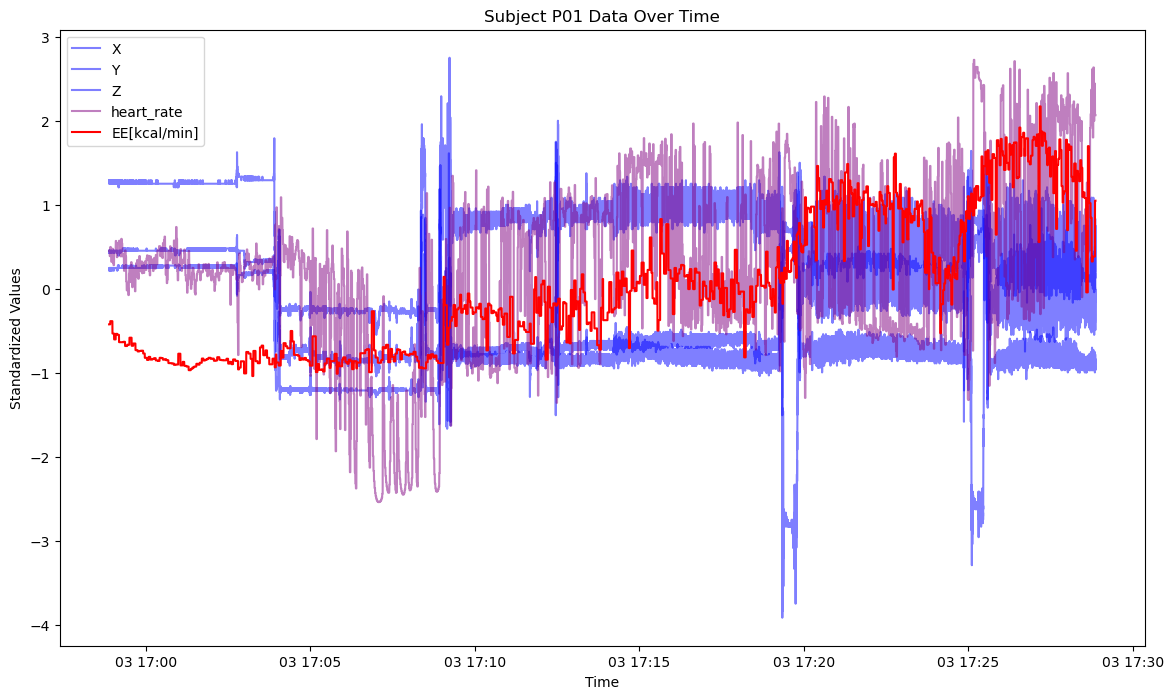

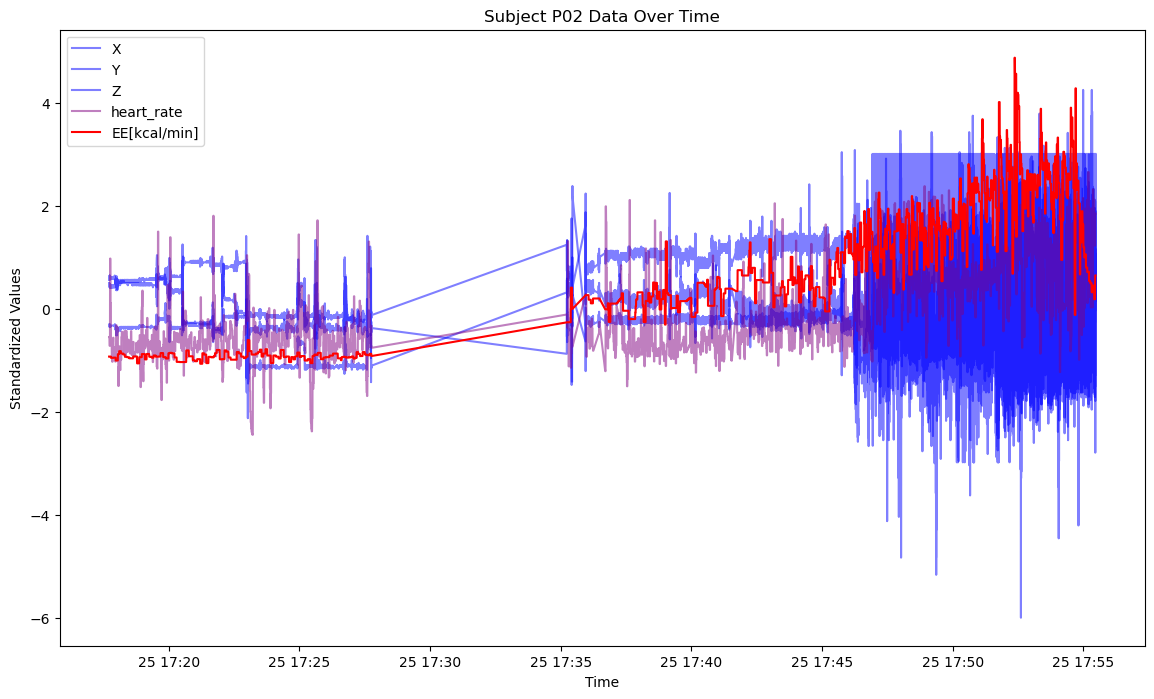

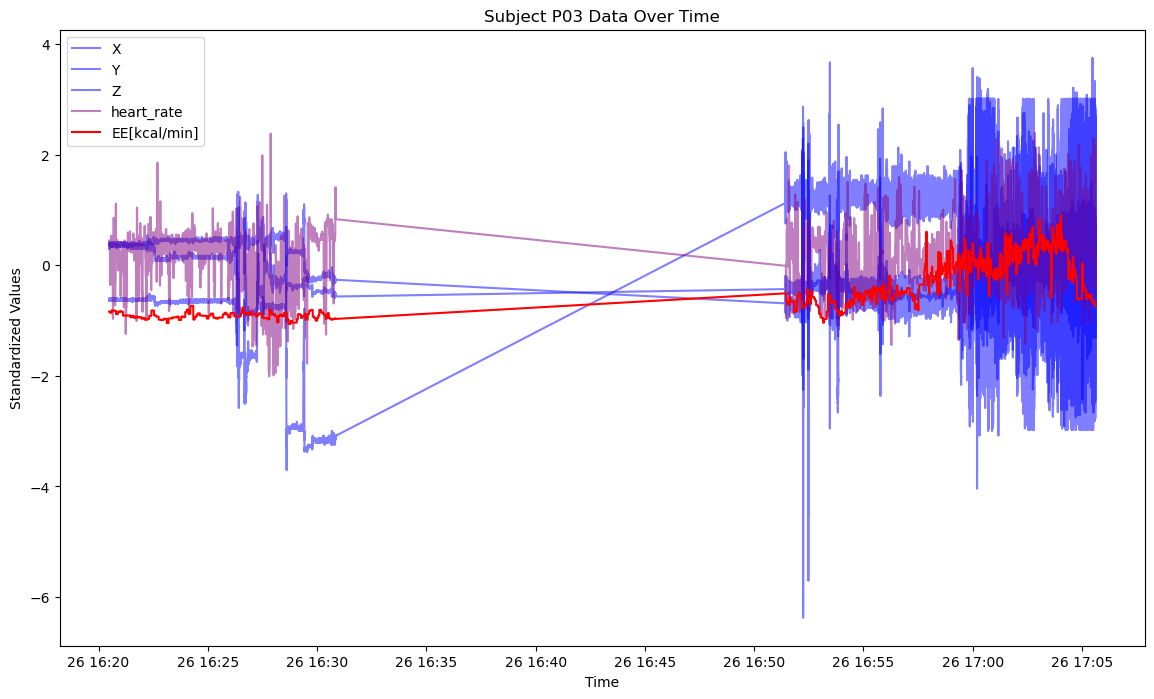

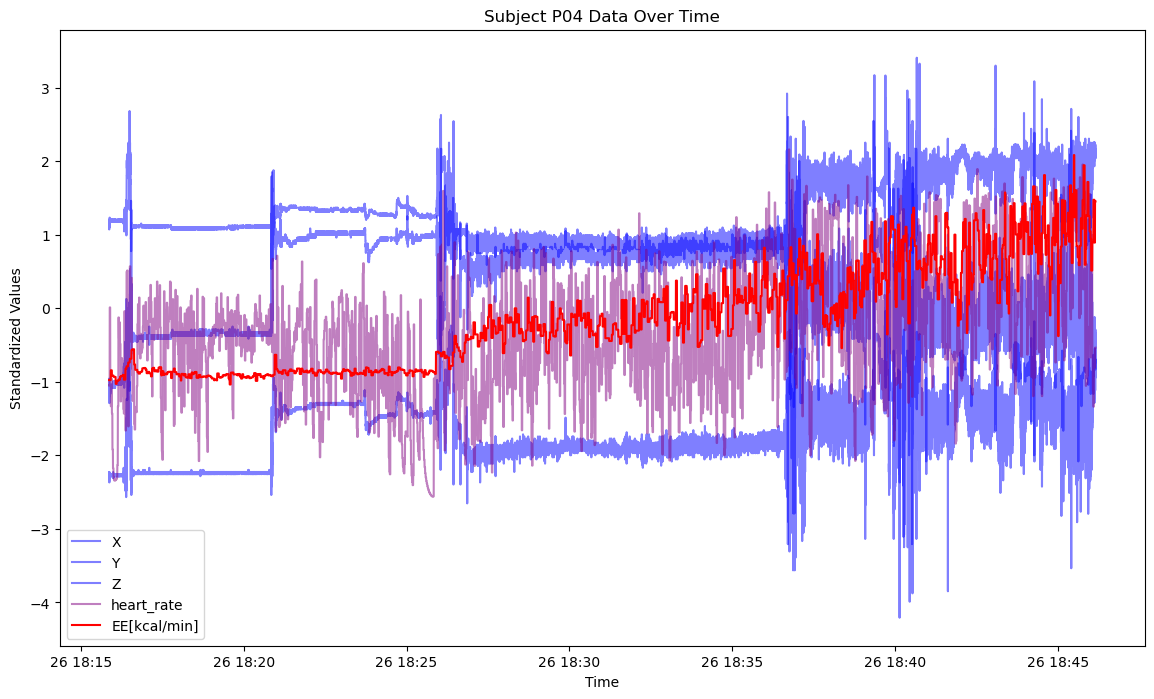

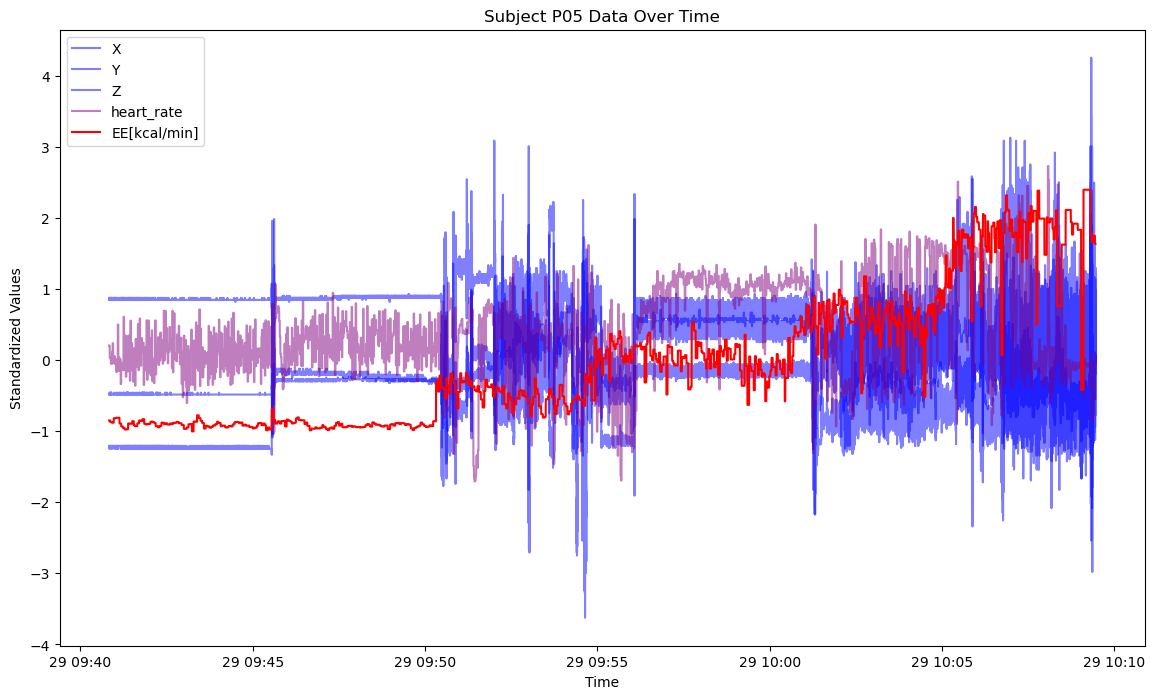

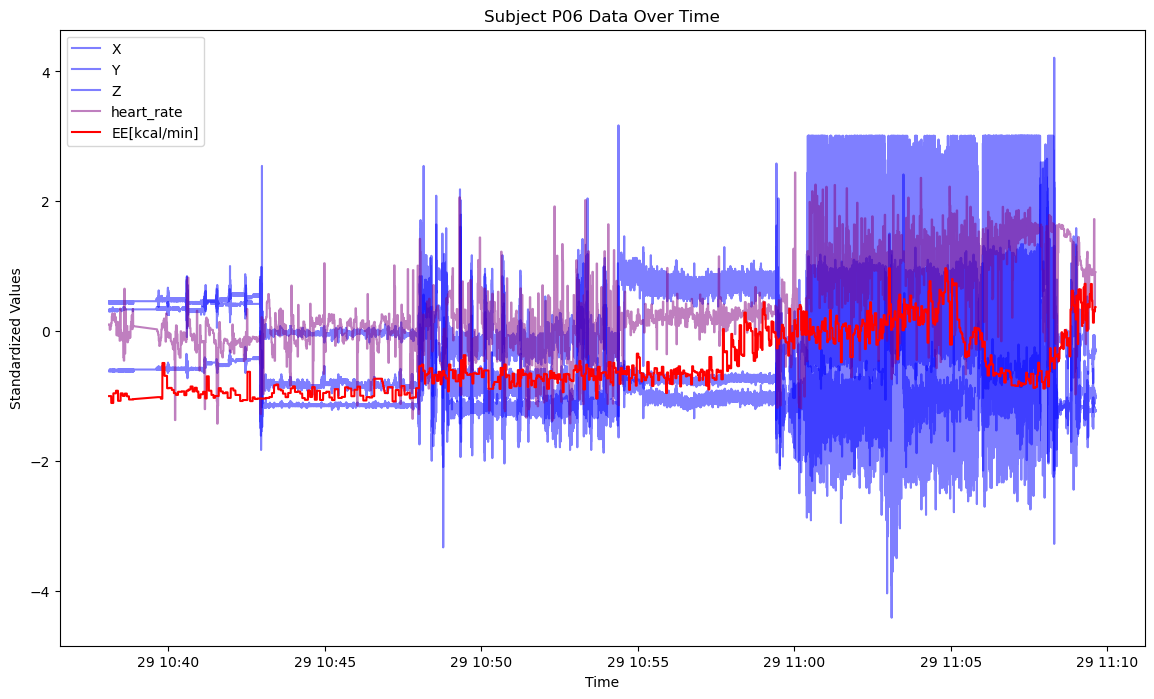

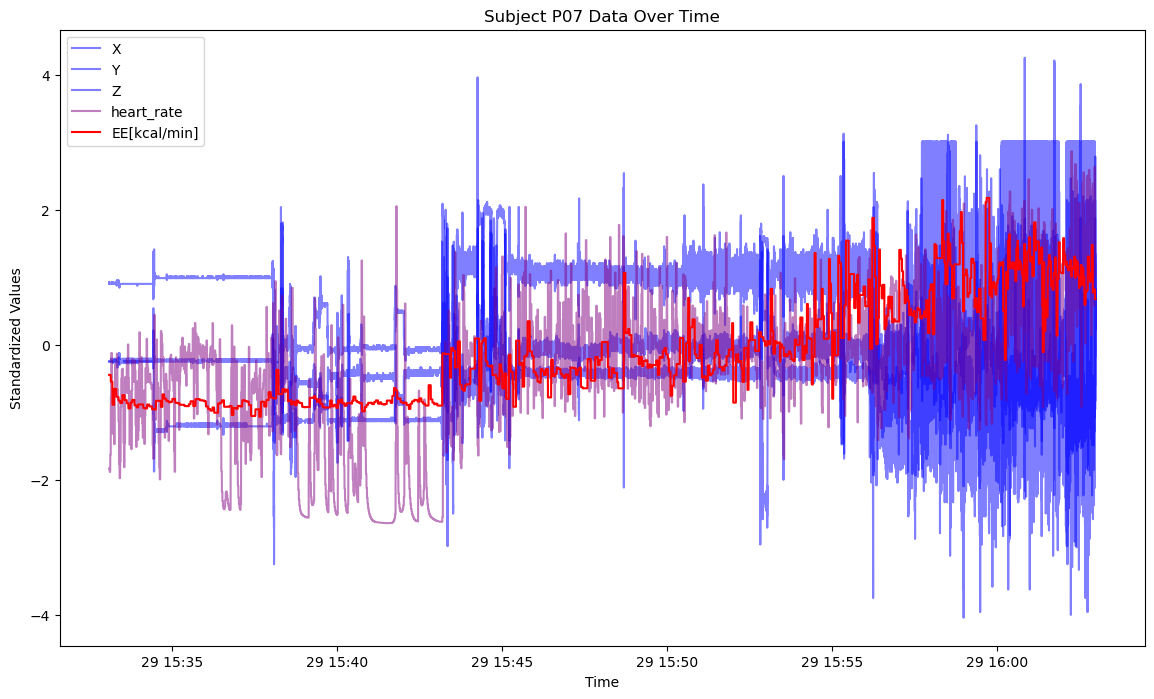

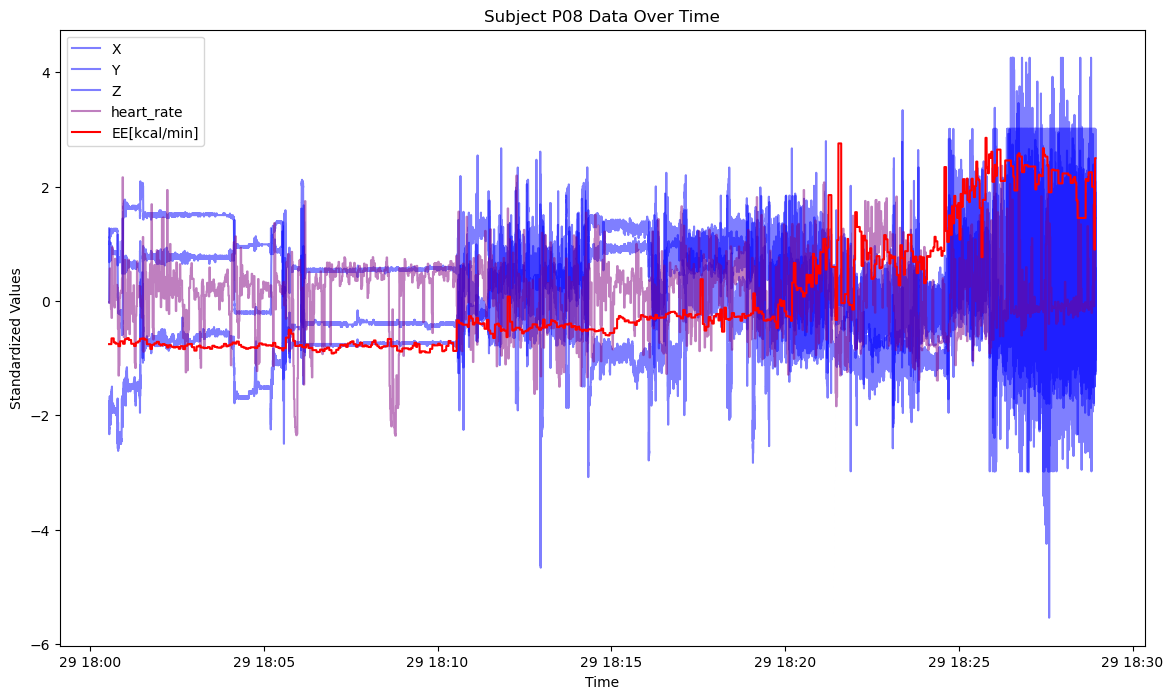

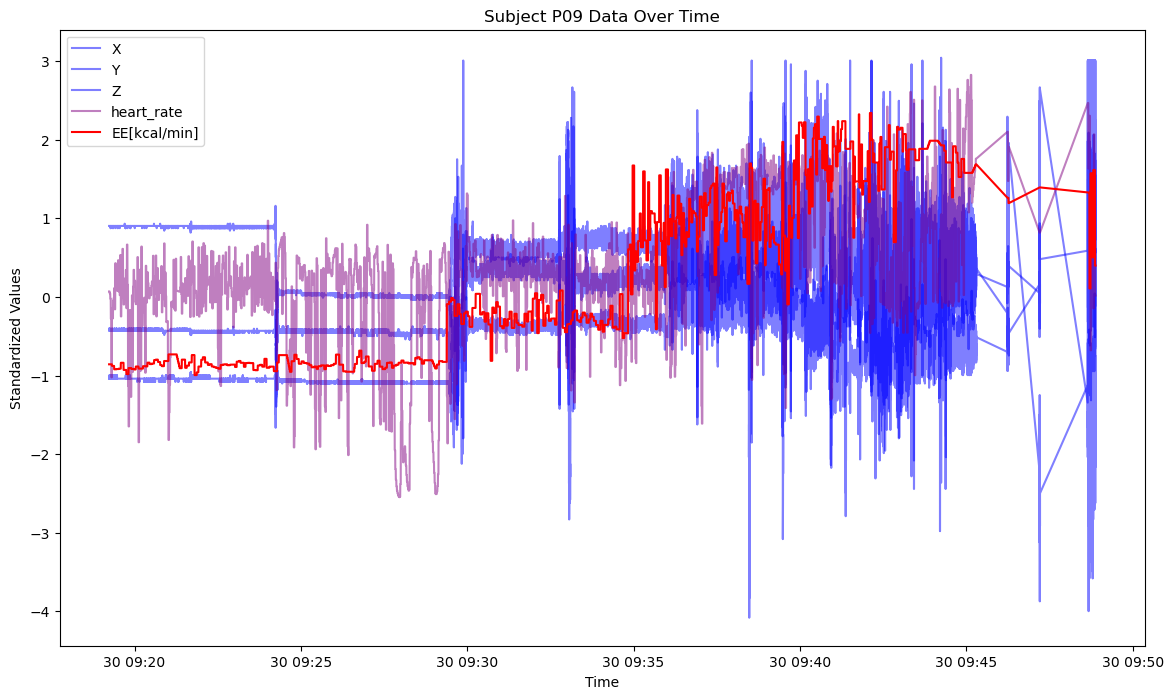

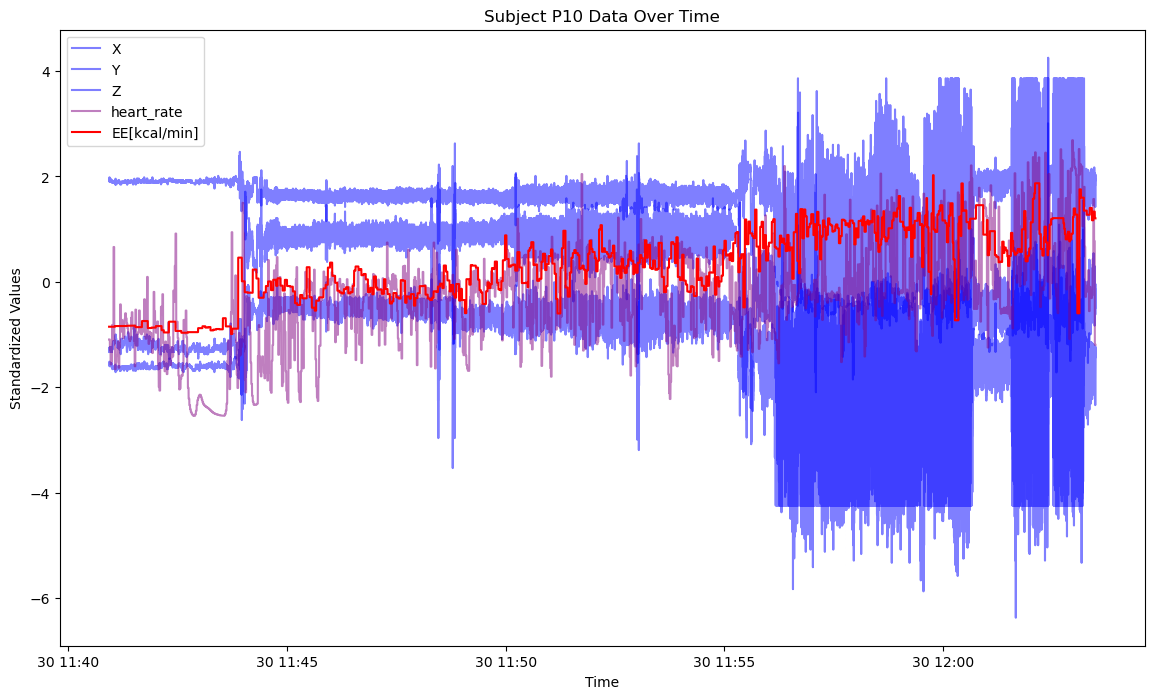

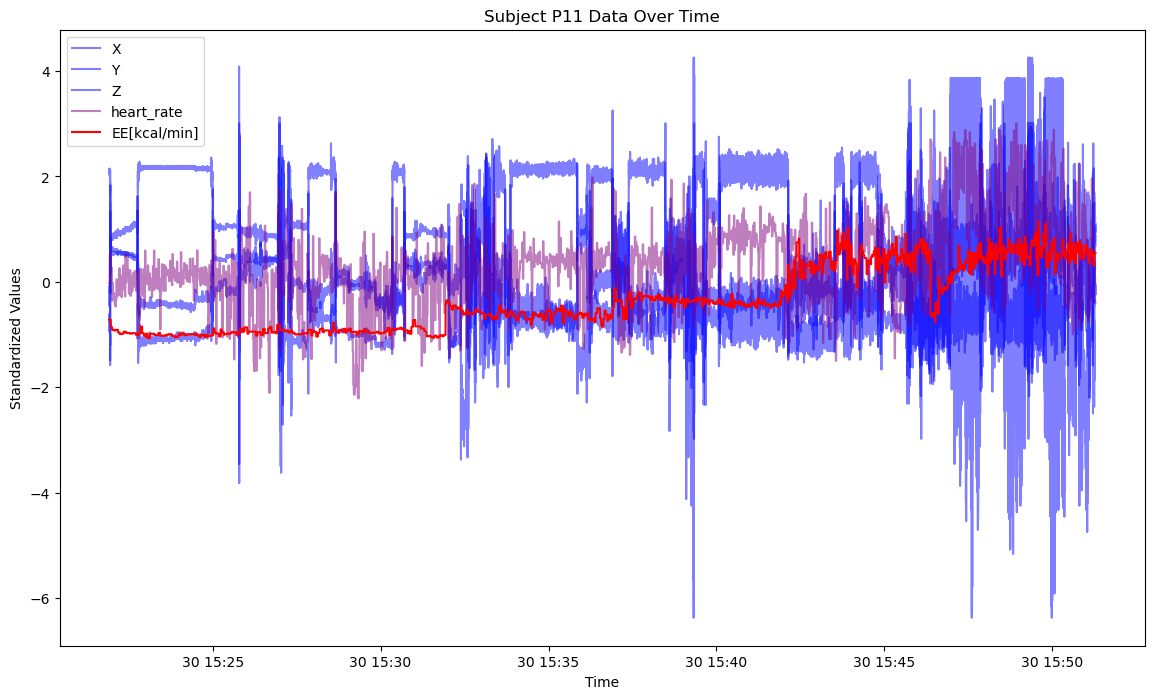

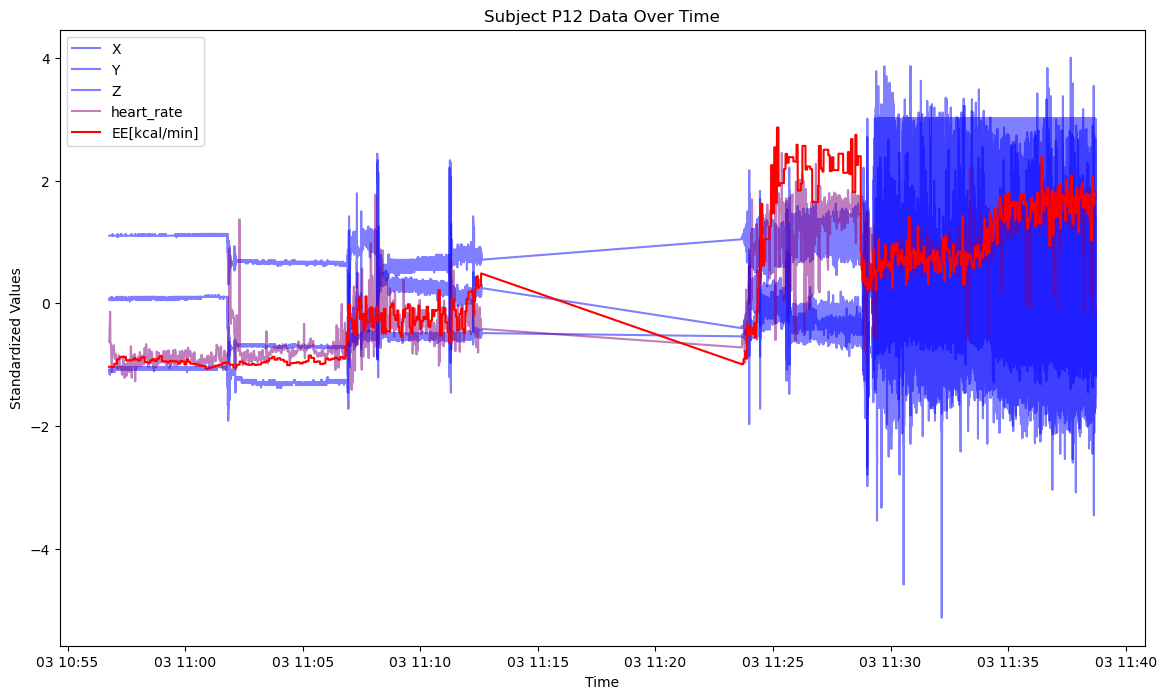

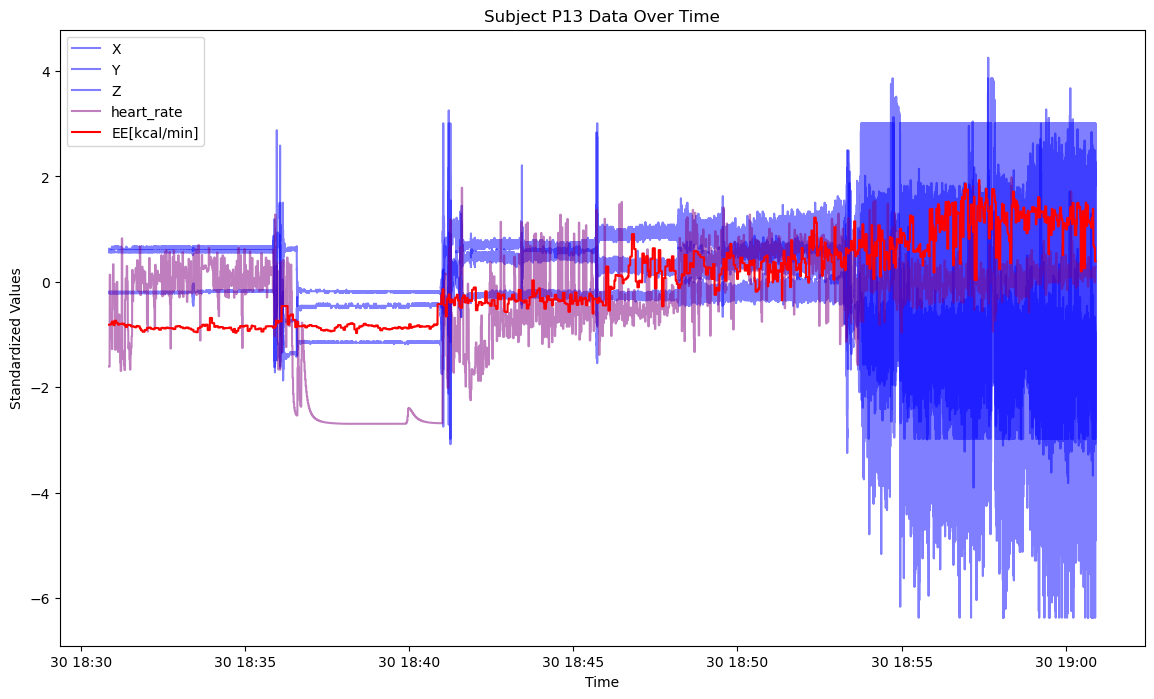

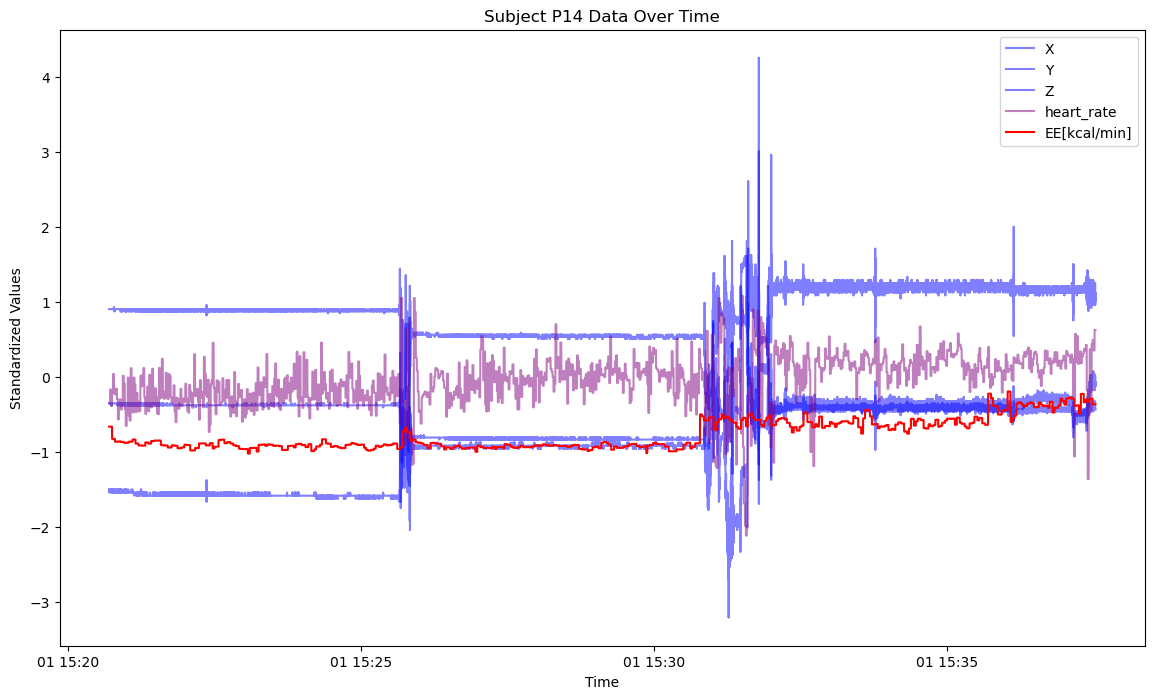

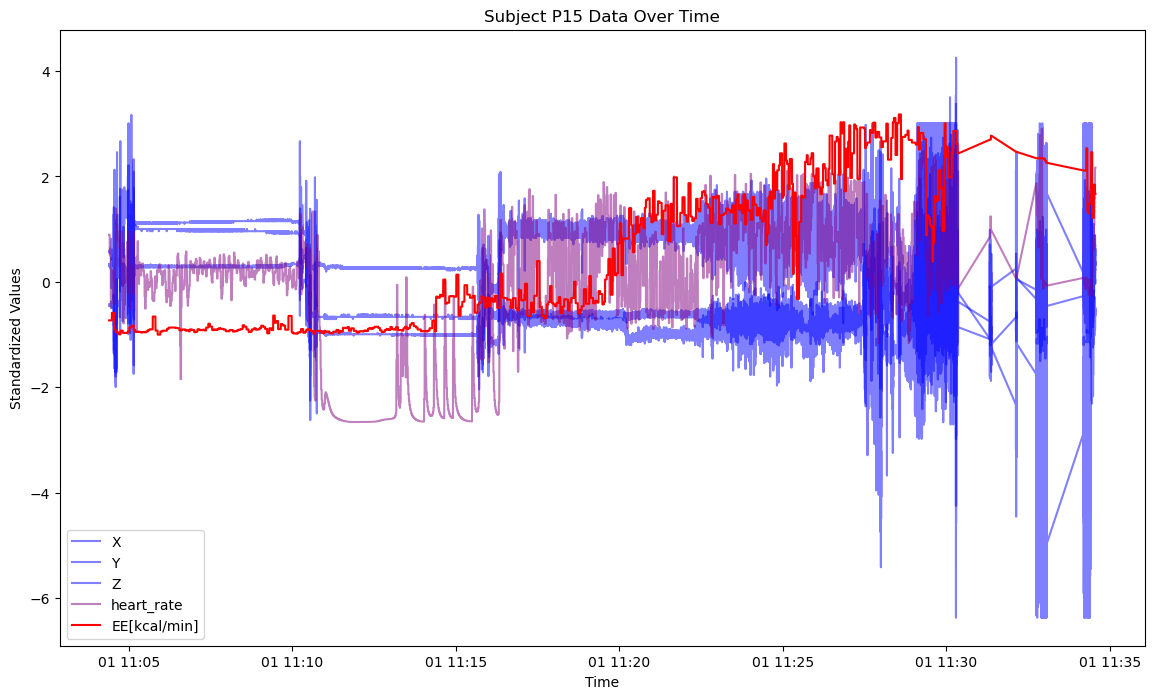

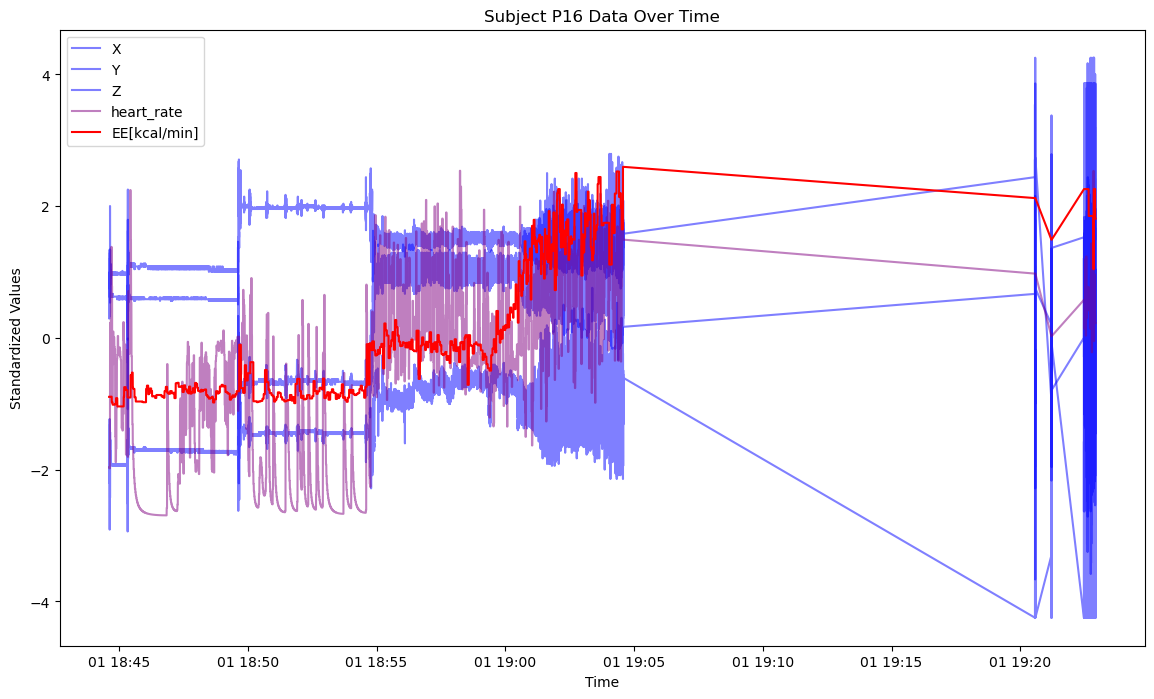

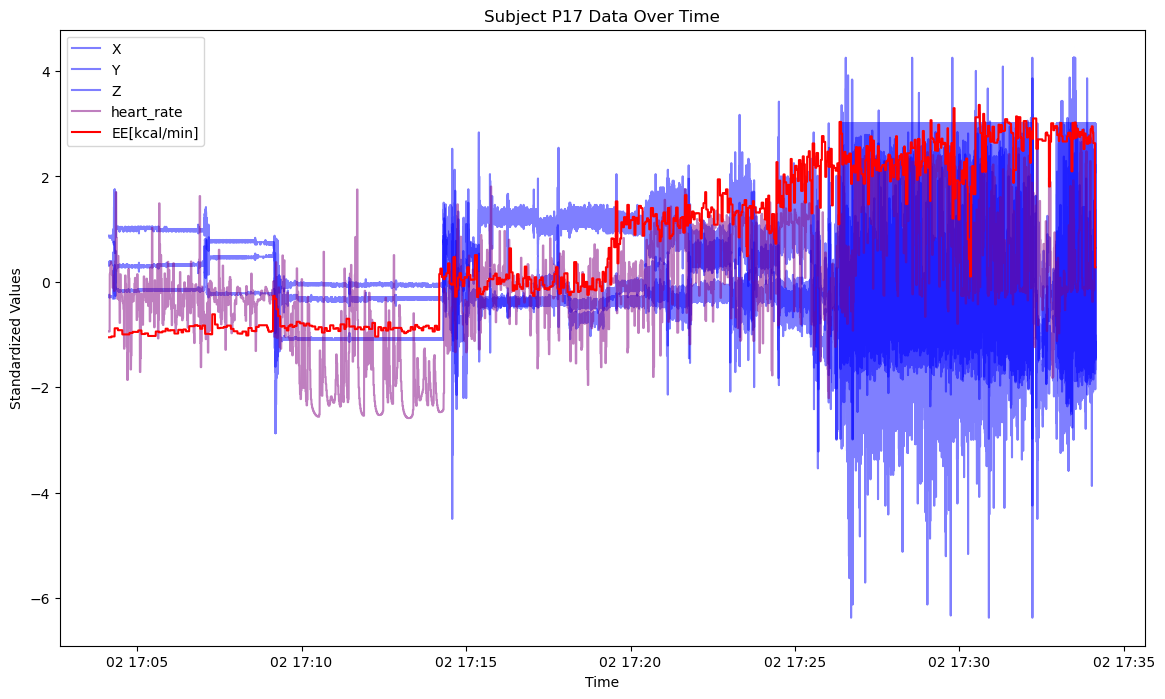

In [28]:
for subject_id in std_df['subject_id'].unique():
    plot_subject_temporal_data(std_df, subject_id)

## Cumulative timespans (P14 error)

In [33]:
def calculate_total_time(df, sample_rate=32):
    total_times = {}
    for subject_id, group in df.groupby('subject_id'):
        total_time_seconds = len(group) / sample_rate
        minutes = int(total_time_seconds // 60)
        seconds = int(total_time_seconds % 60)
        total_times[subject_id] = f"{minutes} minutes, {seconds} seconds. ({total_time_seconds} seconds)"
    return total_times

In [35]:
def calculate_total_times(df, sample_rate=32):
    total_times = {}
    for subject_id, group in df.groupby('subject_id'):
        total_time_seconds = len(group) / sample_rate
        minutes = int(total_time_seconds // 60)
        seconds = int(total_time_seconds % 60)
        total_times[subject_id] = {
            'total_time_seconds': total_time_seconds,
            'minutes': minutes,
            'seconds': seconds
        }

    total_times_df = pd.DataFrame([
        {
            'subject_id': subject_id,
            'total_time_seconds': times['total_time_seconds'],
            'minutes': times['minutes'],
            'seconds': times['seconds']
        }
        for subject_id, times in total_times.items()
    ])
    return total_times_df

In [36]:
total_times = calculate_total_times(std_df)
total_times

,subject_id,total_time_seconds,minutes,seconds
0,P01,1799.0,29,59
1,P02,1753.0,29,13
2,P03,1474.0,24,34
3,P04,1817.0,30,17
4,P05,1717.0,28,37
5,P06,1846.0,30,46
6,P07,1794.0,29,54
7,P08,1703.0,28,23
8,P09,1582.0,26,22
9,P10,1353.0,22,33


In [39]:
total_times_not_P14 = calculate_total_times(std_df[std_df['subject_id'] != 'P14'])

In [44]:
total_times_not_P14_mean = total_times_not_P14['total_time_seconds'].mean()
total_times_not_P14_mean

1680.3125

In [45]:
total_times_not_P14_std = total_times_not_P14['total_time_seconds'].std()
total_times_not_P14_std

185.53695723494013

In [48]:
total_time_sec_P14 = total_times[total_times['subject_id'] == 'P14']['total_time_seconds'].values[0]
total_time_sec_P14

1010.0

In [50]:
(total_times_not_P14_mean - total_time_sec_P14) / total_times_not_P14_std

3.6128246899683845